
```

# Proceso de absorción de SO<sub> 2 </sub>|
El proceso consiste en la separación del SO2 presente en una corriente de aire. Para lograrlo se utiliza una torre absorbedora y agua como solvente. La corriente líquida que sale del equipo (Agua + SO2 ) es transportada a un tanque de almacenamiento.

## 1. Objetivo

Obtener la pérdida de carga en el tramo de cañería que conecta el fondo de la torre con el tanque de almacenamiento por donde circula la corriente líquida.<br>
Realizar los cálculos a distintas condiciones de diseño y operación (longitud, diámetro de la cañería, temperatura, velocidad).


## Conceptos teóricos
### Mecánica de fluidos


**Pérdida de carga**<br>La pérdida de carga en una cañería es la pérdida de presión que se produce debido a la fricción de las partículas del fluido entre sí y contra las paredes de ésta. Experimentalmente se observa que la pérdida de carga es proporcional al cuadrado de la velocidad promedio del fluido, al largo de la cañería e inversamente proporcional al diámetro.
$$\Delta P = f\frac{L}{D}\frac{v^2}{2}\rho$$


$$L = longitud\,de\,la\,cañería.$$$$D = diámetro\,de\,la\,cañería.$$$$v = velocidad\,del\,fluido.$$$$f = factor\,de\,fricción.$$$$ \rho = densidad\,del\,fluido.$$

**coeficiente de fricción** <br>
El factor de proporcionalidad es el coeficiente de fricción (f). Su cálculo depende del régimen de flujo del fluido.<br>Cuando el fluido se encuentra en la zona de transición de flujo laminar a flujo turbulento y flujo turbulento, se utiliza la expresión de la fórmula de Colebrook-White:
$$\frac{1}{\sqrt{f}}=-2log_{10}\left [ \frac{\epsilon/D}{3,7}+\frac{2,51}{Re\sqrt{f}} \right ]$$

$$\epsilon = rugosidad\,de\,la\,cañería$$$$D = diámetro\,de\,la\,cañería$$$$Re = número\,de\,Reynolds$$



**Número de Reynolds**<br>El número de Reynolds es un parámetro adimensional que surge a partir de la relación entre las fuerzas de inercia y las fuerzas viscosas. Es función de la velocidad del fluido, de su densidad, viscosidad y de una longitud característica. Para una cañería esta longitud carcterística es el diámetro.

$$Re = \frac{\rho.v.D}{\mu}$$

$$ \rho = densidad$$$$ \mu = viscosidad$$$$D = diámetro$$$$v = velocidad$$

**Densidad del fluido**<br> La densidad del fluido será calculada realizando una interpolación con los datos de la siguiente taba:

In [ ]:
densidad=pd.read_csv('Densidad.csv')
densidad

,Temperatura [°C],Densidad[kg/m3]
0,1,999.70
1,3,999.98
2,8,999.91
3,10,999.77
4,15,999.19
5,18,999.60
6,20,998.29
7,24,997.38
8,28,996.31
9,30,995.72


**Absorción de gases**<br> La absorción de gases es una operación extensamente utilizada en la industria para la separación de corrientes de gas. Una mezcla gaseosa se pone en contacto con un líquido (solvente), a fin de disolver de manera selectiva uno o más componentes del gas (soluto) y de obtener una solución de éstos en el líquido.
Un equipo que se utiliza con frecuencia para este proceso es la torre empacada. El equipo es una columna cilíndrica que cuenta con entradas y saldias de las corrientes gaseosas y líquidas que circulan por la torre y un empaque o relleno.

La altura de la columna depende de la magnitud de los cambios buscados en la concentración y de la velocidad de transferencia de una sustancia de una fase a la otra (gas a líquido). La ecuación general de diseño para el cálculo de la altura (Z) es la siguiente:

$$Z = \int_{y_e}^{y_s}\frac{G}{SKy_a}\frac{1}{(1-y)(y-y*)}dy$$

G = flujo de gas total (aire + SO<sub> 2 </sub>)<br>
S = sección transversal de la torre<br>
Ky<sub> a </sub> = coeficiente de transferencia de masa<br>
y = fracción molar de SO<sub> 2 </sub><br>
y* = fracción molar de SO<sub> 2 </sub> en equilibrio<br>

Límites de integración:<br>
y<sub> s </sub> = fracción molar de SO<sub> 2 </sub> en el tope (salida)<br>
y<sub> e </sub> = fracción molar de SO<sub> 2 </sub> en el fondo (entrada)<br>

Todos los parámetros, menos la sección de la torre que es constante, son valores que dependen de **y**. La ecuación se puede expresar de la forma:

$$Z = \int_{y_e}^{y_s} f(y)\;dy$$

### Consideraciones y valores de referencia

**Consideraciones**

* Propiedades del fluido iguales a las del agua pura.
* Se puede desestimar la dependencia de la viscosidad del líquido con la temperatura.
* La dependencia de la densidad con la temperatura no es desestimable.
* Para el cálculo del factor de fricción se debe utilizar la ecuación de Colebrook White.
* La cañería es de acero comercial.

**Valores de referencia**

* La viscosidad del agua es aproximadamente 0,00105 kg/(ms).
* Velocidades típicas del agua en cañerias entre 0,5 y 5 m/s.
* La rugosidad de una cañería de acero comercial es 0,05 mm.
* Rango de temperaturas de operación: 35°C - 60°C

## Procedimiento
En la primer parte del trabajo practico se hallaron los valores del número de Reynolds (**Re**), el factor de fricción (**f**) y la pérdida de carga en la cañería para distintos valores de la longitud, diámetro y velocidades promedio del fluido. Para lograrlo se desarrolló una clase "ProcesoAbsorcion" que representa al problema y dentro se definieron los métodos necesarios, como "CalcularFriccion", "PerdidaCarga", entre otros. Luego se definieron los atributos correspondientes y se decidió que aquellos que son variables, el usuario los pueda ingresas a través de un "input".

Para calcular el coeficiente de fricción, se implementaron métodos numéricos. El primero de ellos fue un método de arranque para acotar el intervalo. Se opto por usar el método de bisección debido a que converge siempre (no se le pide nada a la función f(x) salvo que cumpla f(k-1)*f(k)<0) y que la convergencia depende mucho más de la tolerancia que del intervalo elegido y ya que al ser un método de arranque la tolerancia de este método no será muy alta, no tendrá que realizar un gran número de interacciones para converger. También se codifico el método de Regula Falsi pero al probar con distintos valores de diámetro, se observó que no convergía para todos ellos y se resolvió no implementarlo.

El segundo método numérico utilizado fue el método Newton Raphson, se optó implementar este método debido a que es de orden cuadrático y para este caso, no es difícil conocer la derivada de la función.

En último lugar, se decidió el criterio de corte y la tolerancia. Para el primer caso, se utilizó el criterio $ \frac{|x_n - x_{n-1}|}{|x_n|} $ porque para este problema de aplicación resulta ser el más representativo, y para la tolerancia se eligió un valor de $10^{-5}$  ya que nos pareció un criterio razonable con los valores de referencia que se observaron.

En la segunda parte del trabajo practico se pedia calcular la perdida de carga para diferentes valores de temperatura a partir de los datos proporcionados en un archivo CSV. La pérdida de carga depende de la densidad del fluido y esta a su vez, es dependiente de la temperatura y, por lo tanto, para conocer el valor de la pérdida para cualquier valor de temperatura será necesario interpolar los datos del CSV.

Se analizaron los datos de la tabla otorgada de densidad de fluido con respecto a la temperatura y se observó que algunos datos no eran consistentes físicamente ya que la densidad decae con respecto a la temperatura y en varios puntos no se cumplía esta condición. Se procedió descartando esas mediciones experimentales y se obtuvo la siguiente tabla con los valores actualizados



In [ ]:
densidadact=pd.read_csv('Densidadactualizada.csv')
densidadact

,Temperatura [°C],Densidad[kg/m3]
0,1,999.70
1,3,999.98
2,8,999.91
3,10,999.77
4,15,999.19
5,20,998.29
6,24,997.38
7,28,996.31
8,30,995.72
9,37,993.37


Una vez obtenida la tabla de valores actualizados, se decidió implementar la interpolación por trazadores cúbicos, también conocida como Spline, ya que si se hubiese utilizado un polinomio interpolante se presentaría el fenómeno de Runge debido a que son muchos datos (Apéndice I). Se decidió usar el caso de frontera libre porque, aunque se podrían aproximar las derivadas en los extremos, el orden de convergencia de la aproximación seria lineal y como el del Spline es $O(h^4)$ (Excepto en los extremos $O(h^2)$), se introduciría un error mayor.

Por último, en la tercera parte del trabajo practico, se pide calcular la altura de una torre absorbedora de gases para lograr una concentración del 0.5% de SO2 teniendo una corriente de aire a la entrada del 20% de concentración de este compuesto. Para calcular la altura es necesario resolver una integral sobre puntos de la siguiente tabla:


In [ ]:
datosabsorcion=pd.read_csv('Datos_absorcion.csv')
datosabsorcion

,y,y-y*,Kya,G/S
0,0.20000,0.103,5.21,8.62
1,0.18340,0.097,5.04,8.46
2,0.15125,0.087,4.98,8.31
3,0.15000,0.084,4.95,8.12
4,0.10250,0.064,4.74,7.72
5,0.10000,0.062,4.71,7.67
6,0.05375,0.038,4.48,7.60
7,0.05000,0.034,4.46,7.26
8,0.03700,0.021,4.61,7.12
9,0.02000,0.016,4.87,7.03


En principio se planteó el método de Simpson compuesto con paso uniforme pero rápidamente se vio que este tenía una limitación dado que los datos no estaban, en su mayoría, distribuidos de forma uniforme. A raíz de esto se idearon tres formas distintas para solucionar el problema; La primera fue seguir utilizando el mismo método y desestimar los datos que fuesen necesarios para obtener una tabla de valores de paso uniforme, esta solución es muy practica y sencilla, pero tiene como gran desventaja la imprecisión que introduce utilizar menos datos de los que se otorgan.
Como segunda opción se consideró plantear el método de Simpson compuesto pero con paso variable, sin embargo, al implementarlo los resultados no fueron los esperados por lo cual se decidió dejarlo de lado. La última alternativa fue interpolar todos los puntos con el método de Spline y luego aplicar un metodo de interpolacion teniendo más datos de la función.

In [ ]:
######### Librerias #########
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
######### clase #########

class ProcesoAbsorcion:

    def __init__ (self):

        self.temp=int(input("ingrese temperatura entre 35-60 °C: "))
        self.mu=0.00105 #[Kg/ms]
        self.ro=998 #valor de referencia
        self.epsilon=0.00005 #[m]

        self.tol=10**-5
        self.itmax= 100

        self.diametro= float( input("ingrese el diametro [m]:  "))
        self.seccion=1 #float(input('ingrese la sección transversal de la torre de agua [m^2]'))
        self.long= float(input ("ingrese la longitud [m]:  " ))
        self.vel= float(input ("ingrese la velocidad promedio del fluido [m/s]:  "))



    def FijarTolerancia(self, tol):
        self.tol = tol


    ######### metodo de arranque #########

    def Biseccion(self,a, b,f):

        df = pd.DataFrame(columns=('ai','bi','pi','cond'))
        a = a
        b = b
        contador = 0
        x0, x1 = a, b

        if(f(a) * f(b)>0):
            print( "El método no resuelve este tipo de raíz")
            return 1

        while (contador < self.itmax) and (abs((x1 - x0) / x1) > self.tol*1000):
            x0 = x1
            x1 = (a + b)/2
            if f(x1) * f(a) < 0:
                df.loc[contador] = [a,b,(a+b)/2,'<0']
                b = x1
            else:
                df.loc[contador] = [a,b,(a+b)/2,'>0']
                a = x1
            contador += 1

        error = abs((x1 - x0) / x1)
        return x1

    ######### metodo de refinamiento #########

    def NewtonRaphson(self,x0,f,fd):

        df = pd.DataFrame(columns=('xcero','xuno'))
        x0 = x0
        contador = 0

        if(fd(x0)==0):
            return x0
        x1 = x0-f(x0)/fd(x0)


        while (contador < self.itmax) and (abs((x1 - x0) / x1) > self.tol):
            df.loc[contador] = [x0,x1]
            x0 = x1

            if (x1<0):
                print("no se pudo obtener la raiz")
                return 1

            x1 = x0-f(x0)/fd(x0)
            contador += 1

        if(contador== self.itmax):
            print ("El programa llego al maximo posible de iteraciones, no logro converger al valor de la raiz con la tolerancia indicada \n")


        return x1

    def finterpolar(self,df):

        #Creo una matríz vacía con n filas y n columnas.
        matriz = []
        y=(df["y"])
        for i in range(len(y)):
            a = [0]*2
            matriz.append(a)

        for i in range(len(y)):
            matriz[i][0]=y[i]
            matriz[i][1]=df["G/S"][i]/((df["Kya"][i]*(1-df["y"][i])*df["y-y*"][i]))

        p= pd.DataFrame(matriz, columns = ['y', 'F(y)'])
        return p


    ######### Metodo de interpolacion #########

    def SplineLibre(self,df,x,u):
        #u=1 para interpolar densidad
        #u=2 para interpolar absorcion

        # Genero la matriz A de Spline
        n = len(df)
        A = np.zeros((n,n))
        if(u==1):
            Y = df['Densidad[kg/m3]']
            X = df['Temperatura [°C]']

        if(u==2):
            Y = self.finterpolar(df)['F(y)']
            X = self.finterpolar(df)['y']

        A[0][0] = 1
        A[n-1][n-1] = 1
        h = np.zeros(n-1)
        for i in range(0,n-1):
            h[i]=X[i+1]-X[i]
        for i in range(1,n-1):
            A[i][i-1] = h[i-1]
            A[i][i] = 2*(h[i-1]+h[i])
            A[i][i+1] = h[i]

        # Genero el vector B del sistema Ax=B
        B = []
        for k in range(0,n):
            if (k == 0 or k == n-1):
                    B.append(0)
            else:
                    auxB = (3/h[k])*(Y[k+1] - Y[k]) - (3/h[k-1])*(Y[k] - Y[k-1])
                    B.append(auxB)

       #Obtengo los coeficientes para armar los trazadores
        # Coeficientes ci
        c = np.linalg.solve(A, B)

        # Coeficientes ai = yi
        a=Y

        # Coeficientes bi y di.
        b,d = [],[]
        for i in range(0,n-1):
            aux_b = (a[i+1]-a[i])/h[i] - h[i]*(2*c[i]+c[i+1])/3
            b.append(aux_b)
            aux_d = (c[i+1] - c[i])/(3*h[i])
            d.append(aux_d)

        # Evalúo x en el segmento que corresponde
        si =[]

        for k in range(0,n-1):
            if (X[k] == x):
                si = Y[k]
            elif ((x >= X[k] and x <= X[k+1]) or (x <= X[k] and x >= X[k+1])):
                si = a[k] + b[k]*(x - X[k]) + c[k]*(x - X[k])**2 + d[k]*(x - X[k])**3

        return si

    ####### Graficadoras ########

    def GraficarCurvaDensidad(self,dfn):
        ejex = np.linspace(min(dfn["Temperatura [°C]"]), max(dfn["Densidad[kg/m3]"]),num=1000)
        Nx=len(ejex)
        y_sp=np.zeros(Nx,dtype='object')

        for i in range(0,Nx):
                y_sp[i] = self.SplineLibre(dfn,ejex[i],1)

        y_spline=pd.to_numeric(y_sp,errors='coerce')
        #ploteo el polinomio
        plt.plot(ejex, y_spline, linewidth=2, color = 'red')
        #ploteo los puntos
        plt.scatter(dfn["Temperatura [°C]"],dfn["Densidad[kg/m3]"],color='blue')
        plt.legend(['Datos','Spline'],fontsize=10)
        plt.ylabel('Densidad[kg/m3]')
        plt.title('Polinomio Interpolante con Spline')
        plt.xlabel('Temperatura [°C]')
        return

    def GraficarCurvaAbsorcion(self,df):

        ejex = np.linspace(min(self.finterpolar(df)['y']), max(self.finterpolar(df)['y']),num=1000)
        Nx=len(ejex)
        y_sp=np.zeros(Nx,dtype='object')

        for i in range(0,Nx):
            y_sp[i] = self.SplineLibre(df,ejex[i],2)

        y_spline=pd.to_numeric(y_sp,errors='coerce')

        #ploteo el polinomio
        plt.plot(ejex, y_spline, linewidth=2, color = 'red')
        #ploteo los puntos
        plt.scatter(self.finterpolar(df)['y'], self.finterpolar(df)['F(y)'],color='blue')
        plt.legend(['Datos','Spline'],fontsize=10)
        plt.ylabel('F(y)')
        plt.title('Polinomio Interpolante con Spline')
        plt.xlabel('y')
        return

    def graficoActualizar(self,a,b,f,q,k):

        ax.clear()

        gap = 0.2 * (b-a)

        fig.set_figheight(10)
        fig.set_figwidth(15)

        x = np.linspace(a, b)
        y=np.zeros(len(x))

        for i in range (0,len(x)):
            y[i] = f(x[i])

        ax.plot(x, y, 'r', linewidth=1)

        ax.set_ylim(bottom=0)

        fig.text(0.9, 0.1, '$x$')
        fig.text(0.12, 0.9, '$y$')

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')

        ax.set_xticks((a, b))
        ax.set_xticklabels(('$a$', '$b$'))
        ax.set_yticks([])

        h = (b-a) / k

        for i in range(0, k):
            x0 = a + i*h
            x1 = x0 + h

             # Cuadratura
            xq = np.linspace(x0, x1)
            iq = q(xq,x0,x1)
            ax.plot(xq, iq, 'k', linewidth=1)

            # Función
            iy=np.zeros(len(x))
            for i in range (0,len(x)-1):
                iy[i] = f(xq[i])
            ax.fill_between(xq, 0, iq, facecolor='#0099cc', edgecolor ='k')
            ax.fill_between(xq, iq, iy, hatch = '//', alpha=0.1)

        return


    ######### defino la funcion que debo integrar ##########

    def fy(self,a,df):

        y=(df["y"])
        f=0

        for i in range(len(y)):
             if y[i]==a:
                f=df["G/S"][i]/((df["Kya"][i]*(1-df["y"][i])*df["y-y*"][i]))


        return(f)

    ######### metodos de integracion ##########

    def SimpsonC(self,a,b,k,u,df):
        #u=1 para tabla reducida
        #u=2 para funcion interpolante

        #defino el paso
        h = (b-a) / (2*k)

        if(u==1):
            Q = (1/3) * h * self.fy(a,df)
            Q += (1/3) * h * self.fy(b,df)

        elif(u==2):
            Q = (1/3) * h * self.SplineLibre(df,a,2)
            Q += (1/3) * h * self.SplineLibre(df,b,2)

        for i in range (1,2*k):

            if (i % 2 == 0): #par
                if(u==1):
                    Q += (2/3) * h * self.fy(a+i*h,df)
                elif(u==2):
                    Q += (2/3) * h * self.SplineLibre(df,a+i*h,2)

            else: #impar
                if(u==1):
                    Q += (4/3) * h * self.fy(a+i*h,df)
                elif(u==2):
                    Q += (4/3) * h * self.SplineLibre(df,a+i*h,2)

        return Q


    def Romberg(self,a,b,df,s,k):

        R = np.zeros((1,1))
        R[0,0] = ((b-a)/2)*(self.fy(a,df)+self.fy(b,df))

        for i in range (k):


            k = R.shape[0]
            R = np.vstack((R,np.zeros((1,k))))
            R = np.hstack((R,np.zeros((k+1,1))))

            hk = (b-a) / (2**k)

            if(s==1):
                for i in range (0,2**(k-1)):
                    R[k,0] += hk * self.fy(a+(2*i+1)*hk,df)
            elif(s==2):
                for i in range (0,2**(k-1)):
                    R[k,0] += hk * self.SplineLibre(df,a+(2*i+1)*hk,2)

            R[k,0] += R[k-1,0] / 2

            for j in range (1,k+1):
                R[k,j] = R[k,j-1] + (R[k,j-1]-R[k-1,j-1])/(4**j-1)

            k = R.shape[0]-1

        return R[k,k]




    ######### metodos propios de la clase #########


    def CalcularFriccion (self,Re):

        #Defino la funcion
        x = sp.symbols('x')
        y=-2*sp.log((self.epsilon/(3.7*self.diametro))+(2.51/(Re*x**0.5)),10)-x**(-0.5)
        f=sp.lambdify(x,y)

        #calculo la derivada de la funcion
        yd = sp.diff(y,x)
        fd=sp.lambdify(x,yd)

        #aplico metodo de arranque
        x0=self.Biseccion(10**(-3),1000,f)

        #aplico metodo de refinamiento
        ff= self.NewtonRaphson (x0,f,fd)

        return ff

    def CalcularDensidad(self):

        #importo los datos
        densidad=pd.read_csv('Densidad.csv')

        #calculo la densidad
        self.ro= self.SplineLibre(densidad,self.temp,1)


        return


    def PerdidaCarga(self):

        #calculo la densidad
        self.CalcularDensidad()
        print("\n\nEl valor de la densidad es: ",self.ro,"kg/m^3")

        #calculó del numero de Reynolds
        Re= self.ro*self.vel*self.diametro/self.mu
        print("El valor del numero de reynolds es: ",Re)

        #calculó del coeficiente de ficcion
        ff=self.CalcularFriccion(Re)
        print("El factor de fraccion es: " , ff )

        #Calculó de la pérdida de carga
        per=ff*self.long/self.diametro*(self.vel)**2/2 * self.ro
        print("La perdida es: " , per )

        return

    def CalcularAltura(self,c):

        a=0.005#input("ingrese la concentracion de SO2 a la salida")
        b=0.2#input("ingrese la concentracion de SO2 a la salida")

        if(c==1):
            k=int(input("introduzca el numero de intervalos "))
            self.altura=self.seccion * self.SimpsonC(a,b,k,1,datosabs1)
            res = self.altura

        elif(c==2):
            k=2
            self.altura=self.seccion * self.Romberg(a,b,datosabsorcion,1,k)
            res = self.altura

        elif (c==3):
            k=int(input("introduzca el numero de intervalos "))
            self.altura=self.seccion * self.SimpsonC(a,b,k,2,datosabs2)
            res = self.altura

        elif(c==4):
            k=int(input("introduzca el numero de iteracciones "))
            self.altura=self.seccion * self.Romberg(a,b,datosabs2,2,k)
            res = self.altura



        print('\n\n La altura de la torre es' , self.altura,'m^2')
        return res


## Análisis de resultados
### 2. Perdida de carga

#### Ejemplo 1
$Diametro=0.10\ m $

$Temperatura=50\ °C$

$Longitud=10\ m $

$velocidad\ promedio\ del\ fluido= 5\ m/s $

In [ ]:
ejemplo1=ProcesoAbsorcion()
ejemplo1.PerdidaCarga()

ingrese temperatura entre 35-60 °C: 50
ingrese el diametro [m]:  0.1
ingrese la longitud [m]:  1
ingrese la velocidad promedio del fluido [m/s]:  5


El valor de la densidad es:  988.02 kg/m^3
El valor del numero de reynolds es:  470485.7142857144
El factor de fraccion es:  0.01771699339081513
La perdida es:  2188.0929762491455


#### Ejemplo 2
$Diametro=0.15\ m $

$Temperatura=30\ °C$

$Longitud=20\ m $

$velocidad\ promedio\ del\ fluido= 7\ m/s $

In [ ]:
ejemplo2=ProcesoAbsorcion()
ejemplo2.PerdidaCarga()

ingrese temperatura entre 35-60 °C: 50
ingrese el diametro [m]:  0.1
ingrese la longitud [m]:  3
ingrese la velocidad promedio del fluido [m/s]:  5


El valor de la densidad es:  988.02 kg/m^3
El valor del numero de reynolds es:  470485.7142857144
El factor de fraccion es:  0.01771699339081513
La perdida es:  6564.278928747436


Se puede ver que el grafico de la curva que interpola los datos de la densidad respecto de la temperatura es:

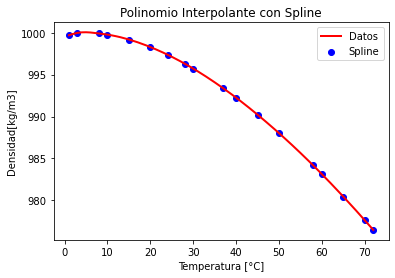

In [ ]:
ejemplo1.GraficarCurvaDensidad(densidadact)

### 2. Calculo de la altura

#### Ejemplo

$Sección\ =1 \ m^2 $


In [ ]:
ejemplo=ProcesoAbsorcion()

ingrese temperatura entre 35-60 °C: 50
ingrese el diametro [m]:  0.1
ingrese la longitud [m]:  3
ingrese la velocidad promedio del fluido [m/s]:  8


En esta sección se utilizó una variable de control $C$ para seleccionar el método de integración por el cual se quiere calcular la altura de la torre de agua siendo:
ó
* C=1 : método de Simpson sin interpolación

* C=2 : método de Romberg sin interpolación

* C=3 : método de Simpson con interpolación

* C=4 : método de Romberg con interpolación

###### Primer caso ($C=1$)

En el primer caso  obtendremos la altura de la torre con el método de Simpson desestimando los datos necesarios para que este funcione correctamente. La tabla entonces será:

In [ ]:
datosabs1=pd.read_csv('Datos_absorcion_actualizada.csv')
datosabs1

,y,y-y*,Kya,G/S
0,0.20000,0.103,5.21,8.62
1,0.15125,0.087,4.98,8.31
2,0.10250,0.064,4.74,7.72
3,0.05375,0.038,4.48,7.60
4,0.00500,0.005,4.82,6.93


Se puede observar que con la definicion de paso de nuestra funcion ($h=\frac{b-a}{2\cdot k}$) los unicos valores permitidos de k son $k=1$ y $k=2$. Lo que hicimos para lograr que funcione el codigo al no tener todos los valores de la funcion, sino que teniamos 11 valores en la tabla, fue tomar solo los valores que nos permitian que al calcular el paso con 1 o 2 cantidad de intervalos, nos de como resultado el siguiente valor conocido.

In [ ]:
c1 = ejemplo.CalcularAltura(1)

introduzca el numero de intervalos 2


 La altura de la torre es 9.557978036109219 m^2


###### Segundo caso ($C=2$)
En este caso se buscara el valor por el metodo de Romberg en el cual se utilizaran 2 aproximaciones debido a la cantidad de puntos con los que se cuenta.

In [ ]:
c2 = ejemplo.CalcularAltura(2)



 La altura de la torre es 9.52551220182845 m^2


###### Tercer caso ($C=3$)
Para el tercer caso se realizará una interpolación de los puntos de la tabla completa para poder obtener más valores de la función respecto a los valores de y.


In [ ]:
datosabs2=pd.read_csv('Datos_absorcion.csv')
datosabs2

,y,y-y*,Kya,G/S
0,0.20000,0.103,5.21,8.62
1,0.18340,0.097,5.04,8.46
2,0.15125,0.087,4.98,8.31
3,0.15000,0.084,4.95,8.12
4,0.10250,0.064,4.74,7.72
5,0.10000,0.062,4.71,7.67
6,0.05375,0.038,4.48,7.60
7,0.05000,0.034,4.46,7.26
8,0.03700,0.021,4.61,7.12
9,0.02000,0.016,4.87,7.03


La interpolación se hará con el método de Spline por motivos similares a los analizados en la sección anterior, es decir, para no introducir fenómeno de Runge y porque este consta de una convergencia de orden cuarto.

Es muy importante notar que al igual que el método de Spline, el de Simpson es de orden cuarto y, por lo tanto, no tiene sentido aumentar en gran cantidad los intervalos del mismo ya que esto requerirá mucho más costo computacional, pero sin embargo el resultado no tendrá mucha más precisión debido al error introducido a la hora de interpolar.

La interpolacion entonces queda;

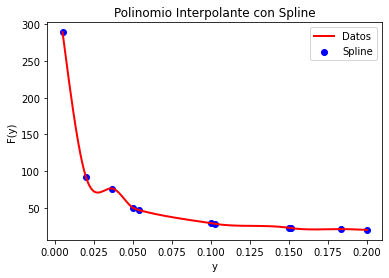

In [ ]:
ejemplo.GraficarCurvaAbsorcion(datosabs2)

Los resultados obtenidos se pueden observar en el siguiente gráfico:

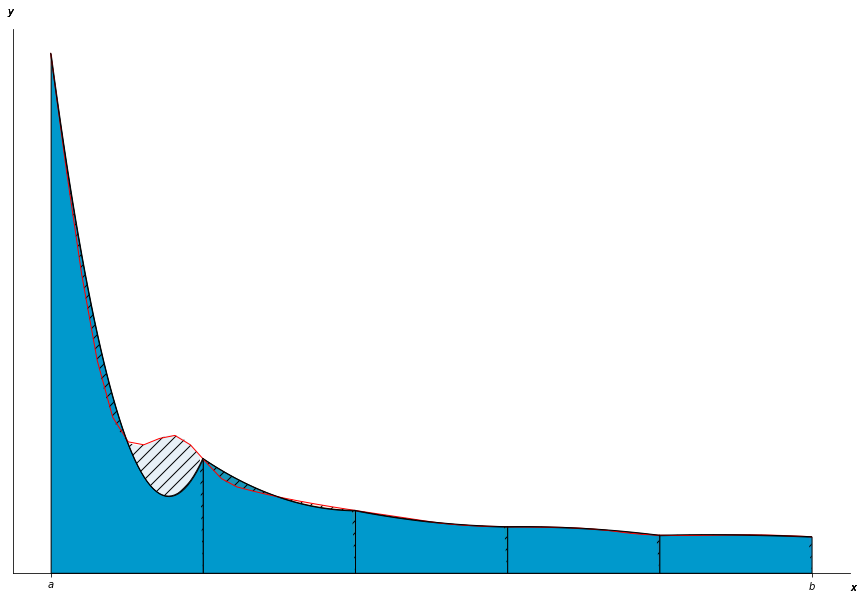

IntSlider(value=5, description='Intervalos', max=10, min=1)

Aproximación 8.83256063680719


In [ ]:
def f(x):
    return ejemplo.SplineLibre(datosabs2,x,2)

def q(x,a,b):
    h = (b-a)/2
    F01 = (f(a+h) - f(a)) / h
    F12 = (f(b) - f(a+h)) / h
    F012 = (F12 - F01) / (2*h)
    return f(a) + F01 * (x-a) + F012 * (x-a) * (x-(a+h))

slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description=('Intervalos'));
c3_k = [0,0,0,0,0,0,0,0,0,0]
def on_slider_change(change):
    clear_output(wait=True)
    k = change['new']
    ejemplo.graficoActualizar(0.005,0.2,f,q,k)
    display (fig)
    display (slider)

    i = 1
    while i != 10:
        c3_k[i] = ejemplo.SimpsonC(0.005,0.2,i,2,datosabs2)
        i = i + 1
    print ('Aproximación', ejemplo.SimpsonC(0.005,0.2,k,2,datosabs2))


slider.observe(on_slider_change, names='value')

fig, ax = plt.subplots()
plt.close(fig)

on_slider_change({'new':1})


In [ ]:
#para hacerlo numericamente sin el slider#
intervalos = input("Ingresar numero de intervalos: ")
print(c3_k[int(intervalos)])

Ingresar numero de intervalos: 8
9.020065840246318


###### Cuarto caso ($C=4$)

Para este caso se utilizo el metodo de interpolacion de Romberg teniendo en cuenta nuevamente que tiene orden de convergencia cuarto y que no sera necesario realizar tantas iteracciones por el error introducido al interpolar.

In [ ]:
c4= ejemplo.CalcularAltura(4)

introduzca el numero de iteracciones 8


 La altura de la torre es 9.041326325886974 m^2


In [ ]:
errorRelativo = 100*(abs(c2-c1)/c2)
print("El error relativo de simpson sin interpolar y romberg es:", errorRelativo , "%")

El error relativo de simpson sin interpolar y romberg es: 0.3408303258961464 %


In [ ]:
errorRelativo = 100*(abs(c4-(c3_k[8]))/c4)
print("El error relativo de simpson interpolado con 8 intervalos y romberg con 3 intervalos es:", errorRelativo , "%")

El error relativo de simpson interpolado con 8 intervalos y romberg con 3 intervalos es: 0.23514786298315266 %


In [ ]:
errorRelativo = 100*(abs(c2-(c3_k[8]))/c2)
print("El error relativo de simpson interpolado con 8 intervalos y romberg sin interpolar :", errorRelativo , "%")

El error relativo de simpson interpolado con 8 intervalos y romberg sin interpolar : 5.306238141032567 %


## Conclusión

Una vez terminado el trabajo, se pueden obtener conclusiones acerca de cada etapa de el mismo. En primer lugar, para obtener el factor de fricción con la ecuación no lineal de Colebrook-White fue necesario plantear un método numérico de resolución de ecuaciones no lineales de arranque y uno de refinamiento. Se realizo de esta manera debido a que, si solamente se usara un método de arranque, la cantidad de iteraciones necesarias para obtener un resultado con poco error podría ser muy alta, en cambio, si se utilizara solo un método de refinamiento el valor semilla podría estar muy alejado del resultado buscado y el método podría diverger.  Lo que se hace, entonces, es acercarse al valor semilla con el método de arranque con una tolerancia grande, así converge en pocas iteraciones.  A este valor semilla hallado lo utilizamos en el método de refinamiento, que es de convergencia cuadrática, para finalmente hallar el valor buscado.

Se decidió implementar como método de arranque el de bisección ya que es un método sumamente sencillo, que le exige muy pocas condiciones a la función (f(a) * f(b) < 0) y porque, mas allá de que tenga un orden de convergencia bajo, depende de la tolerancia, y al ser un método de arranque, es alta. Por otro lado, para el método de refinamiento se utilizó el método de Newton-Raphson debido a que su convergencia es cuadrática, y para esta aplicación en particular, no es difícil conocer su derivada y no se anula en el intervalo. Se consideraron otros métodos, pero ya sea por tener un orden de convergencia inferior o por exigirle más condiciones a la función, se decidió que esta combinación era la más adecuada.

Para la segunda parte era necesario interpolar los valores de la viscosidad de un archivo CSV. Se decidió utilizar el método de trazadores cúbicos o Spline debido a que, como se vio en el Apéndice I, para otros métodos que calculan el polinomio interpolante, el fenómeno de Runge tenía una gran incidencia. Es importante notar que el método nombrado "SplineLibre" consiste en la obtención y posterior resolución de una matriz cuadrada, rala, estrictamente diagonal dominante y no simétrica. Para resolver el sistema de ecuaciones lineales se utilizó la factorización por Doolittle, sin embargo, se podrían haber aplicado métodos iterativos estacionarios, como Jacobi o Gauss Seidel, ya que la matriz cumple con las condiciones pedidas. Para usar un método iterativo no estacionario, se debería verificar, además, que la matriz sea definida positiva, lo cual se podría lograr si se resuelve el sistema utilizando la matriz transpuesta como $A^TA*x = A^TB$ y luego se vuelve al sistema original.

Para la tercer y última parte del trabajo, se tuvo que calcular la altura necesaria de la torre para cumplir con las especificaciones dadas en un archivo CSV. Se pedía resolver una integral sobre los datos con un método compuesto y luego con el de la extrapolación de Richardson y comparar los resultados obtenidos. En primer lugar se decidió utilizar el método de Simpson compuesto con paso uniforme dado que es de orden de convergencia cuarto, pero se notó que tenía una gran limitación dado que los datos no estaban distribuidos uniformemente en su gran mayoría. Se plantearon las tres alternativas explicadas anteriormente, de las cuales se implementaron el método de Simpson con paso uniforme, el método de Romberg y luego la interpolación para obtener más puntos y así poder aplicar los métodos con un intervalo menor. Es importante volver a remarcar que una vez obtenido el polinomio interpolante no resulta útil aumentar el paso de forma indefinida ya que esto requerirá un gran costo computacional y, sin embargo, el método de interpolación (Spline) es de orden cuarto y, por lo cual, el resultado no tendrá mucha más precisión.

Por último, se analizarán los resultados obtenidos para los distintos métodos de integración; En primer lugar, se observó que la diferencia entre los resultados del método de Simpson compuesto y el de Romberg son muy similares, esto se puede explicar fácilmente ya que ambos métodos tienen un orden de error proporcional a la derivada cuarta de la función. Por otro lado, se encuentra una diferencia mayor comparando los resultados al interpolar respecto a los resultados obtenidos anteriormente, esta diferencia se puede entender por el error propio que introduce interpolar una función con una cantidad limitada de puntos.

Ya culminado el análisis podemos concluir que los métodos en los cuales se usó una interpolación de curva no son útiles a la hora de resolver el problema debido a que exigen más costo computacional, no es conveniente reducir en gran cantidad el paso por lo explicado anteriormente y los resultados no son mejores por el error incorporado al interpolar. Por otro lado, los métodos de Simpson y Romberg mas allá de tener que utilizar menos datos de los disponibles otorgan buenos resultados, sin embargo, el método de Simpson tiene la desventaja de que al reducir el paso debemos calcular todos los valores, menos lo de los extremos, nuevamente.

Finalmente podemos concluir que la realización de este trabajo posibilito el traslado de los conceptos teóricos adquiridos durante la materia a una aplicación concreta. Se tuvieron que utilizar métodos de resolución de ecuaciones no lineales, interpolación, resolución de ecuaciones lineales e integración y a su vez decidir entre varias alternativas teniendo en cuenta no solo cual era más exacta, sino también cual era más conveniente respecto a la exigencia y el costo. también se obtuvo experiencia en el uso de la herramienta "Júpyter Notebook" y en la programación orientada a objetos.





## Apéndice I
### Fenómeno de Runge

   El fenómeno de Runge es un problema que sucede cuando se usa interpolación polinómica con polinomios de alto grado, generalmente utilizando puntos equidistantes. En el análisis de este trabajo en particular, se observó que, al tener 17 datos experimentales, el polinomio interpolante resultante iba a ser de grado 16, es decir el polinomio seria de grado alto. Sin embargo, también se notó que los datos no estaban uniformemente distribuidos.
  
  Se realizo una prueba que consistió en buscar el polinomio interpolante con el método de Larange baricentrico y ver la incidencia del fenómeno de Runge en nuestros resultados. Como se observa en el grafico "fenómeno de Runge" este afecta de gran manera al polinomio interpolante, en los extremos toma valores que no son consistentes con los datos obtenidos experimentalmente.


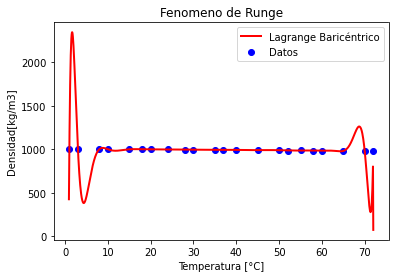

In [ ]:
######## Defino el metodo baricentrico de Lagrange #######

def LagrangeBaricentricoPlot (df,x):
    N=len(df)
    W=np.zeros(N)
    P=0
    L=1
    PB=0
    for i in range (0,N):
        if x==df["Temperatura [°C]"][i]:
            return df["Temperatura [°C]"][i]
        L*=x-df["Temperatura [°C]"][i]
        w=1
        for j in range (0,N):
            if j != i:
                 w*=1/(df["Temperatura [°C]"][i]-df["Temperatura [°C]"][j])
        W[i]=w
        P+=(w*df["Densidad[kg/m3]"][i])/(x-df["Temperatura [°C]"][i])
    PB=L*P
    return PB

####### Grafico el polinomio interpolante ##########

ejex = np.linspace(min(densidad["Temperatura [°C]"])*0.9, max(densidad["Temperatura [°C]"])*1,num=1000)
Nx=len(ejex)
y_pl=np.zeros(Nx)
y_plb=np.zeros(Nx)

for i in range(0,Nx):
    y_plb[i] = LagrangeBaricentricoPlot(densidad,ejex[i]);

plt.ylabel('Densidad[kg/m3]')
plt.xlabel('Temperatura [°C]')
plt.plot(ejex, y_plb, linewidth=2, color = 'red')
plt.scatter(densidad["Temperatura [°C]"], densidad["Densidad[kg/m3]"], color = 'blue')
plt.legend(['Lagrange Baricéntrico','Datos','limite','dato'],fontsize=10)
plt.title('Fenomeno de Runge');